In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
CSV = "/Users/user/data/research/proton-deuteron/csv/plottingdata.csv"

In [8]:
df = pd.read_csv(CSV)
df.drop(["track_idx"], axis=1)

,run,subrun,event,trkvtxx,trkvtxy,trkvtxz,trkendx,trkendy,trkendz,trklength,wctrk_XFaceCoor,wctrk_YFaceCoor,wctrk_momentum,wctrk_theta,wctrk_phi
0,8675,54,5807,19.64471,5.93438,3.40710,14.36033,4.18944,31.65193,28.86125,18.45386,5.46417,845.25305,0.07892,-3.13656
1,8675,54,5821,22.14739,6.86254,3.35288,19.86873,7.10694,30.00206,26.77493,22.24053,7.68748,786.46625,0.07488,-3.10346
2,8675,54,5844,21.10393,2.34666,3.17951,19.45838,2.40517,11.50735,8.49927,22.95857,-0.91929,695.66016,0.06052,-3.12150
3,8675,68,7061,16.81808,-0.93871,3.23513,16.00233,-3.97466,23.08302,20.37756,18.36346,-0.34143,801.40570,0.08476,-3.03038
4,8675,88,9222,26.47159,-5.76675,2.65268,26.13903,-5.70048,8.23611,5.59422,24.87471,-5.91387,658.67987,0.06195,-2.84671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,9781,103,16997,18.72320,0.93223,3.74945,15.86716,0.09138,25.89450,22.35578,19.96970,0.82272,849.26324,0.08109,-3.08616
7632,9781,109,17945,17.92384,-8.18403,3.10379,14.58660,-10.27835,24.98164,22.24012,17.62879,-5.06135,768.64062,0.07746,-2.87973
7633,9781,109,17974,19.55410,3.15253,3.18123,18.51553,3.68878,8.57229,5.52662,20.07806,0.57546,676.74304,0.06135,3.11469
7634,9781,112,18441,22.34751,-7.74492,3.35788,19.09847,-7.69374,34.85216,31.67954,21.13656,-5.71262,848.36969,0.07988,-2.92997


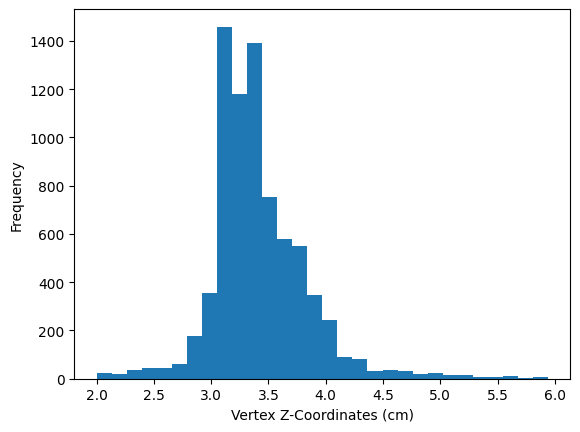

In [ ]:
trkvtxz = np.array(df['trkvtxz'].values)

# No of entries, detail about what the data is. 
# What are we plotting. 47 x 40 x 90 cm 
# z - along the beam.
# slanting wires 
# artefact of reconstruction
# don't look for deuterons further than 6 

plt.hist(trkvtxz, bins=30)

plt.xlabel('Vertex Z-Coordinates (cm)')
plt.ylabel('Frequency')
plt.show()

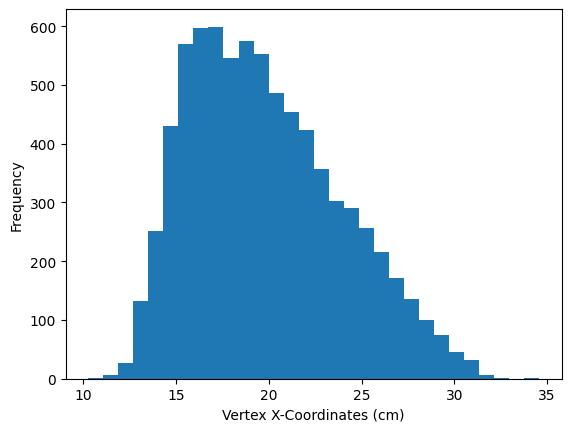

In [25]:
trkvtxx = np.array(df['trkvtxx'].values)

plt.hist(trkvtxx, bins=30)
plt.xlabel('Vertex X-Coordinates (cm)')
plt.ylabel('Frequency')
plt.show()

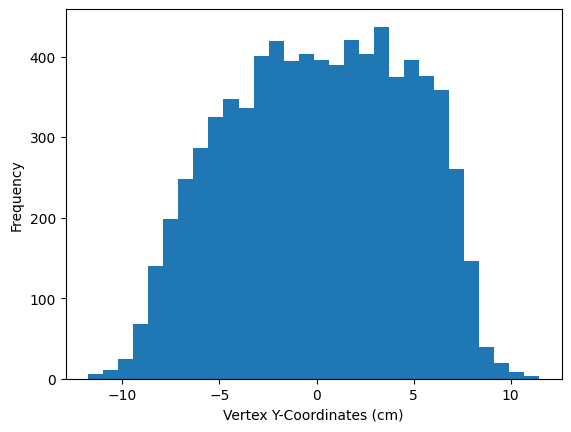

In [26]:
trkvtxy = np.array(df['trkvtxy'].values)

plt.hist(trkvtxy, bins=30)
plt.xlabel('Vertex Y-Coordinates (cm)')
plt.ylabel('Frequency')
plt.show()

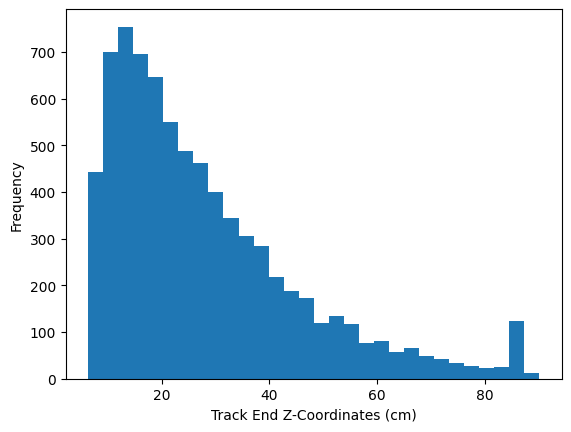

In [27]:
trkendz = np.array(df['trkendz'].values)

plt.hist(trkendz, bins=30)
plt.xlabel('Track End Z-Coordinates (cm)')
plt.ylabel('Frequency')
plt.show()

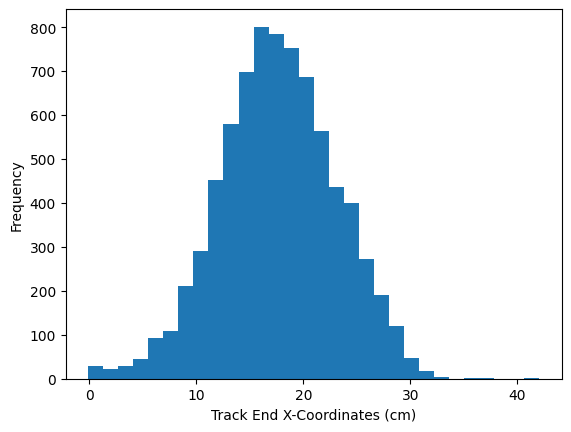

In [28]:
trkendx = np.array(df['trkendx'].values)

plt.hist(trkendx, bins=30)
plt.xlabel('Track End X-Coordinates (cm)')
plt.ylabel('Frequency')
plt.show()

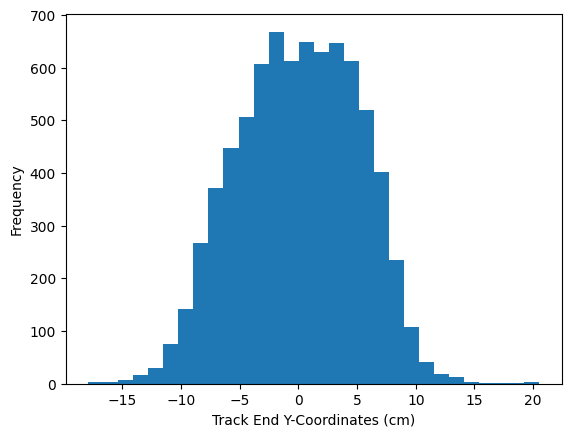

In [30]:
trkendy = np.array(df['trkendy'].values)

plt.hist(trkendy, bins=30)
plt.xlabel('Track End Y-Coordinates (cm)')
plt.ylabel('Frequency')
plt.show()

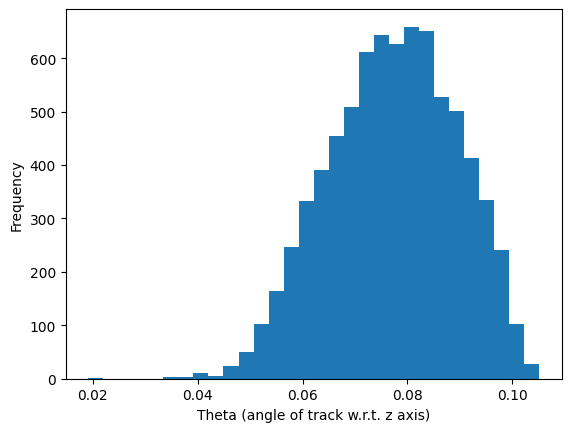

In [ ]:
wctrk_theta = np.array(df['wctrk_theta'].values)

# put in degrees

plt.hist(wctrk_theta, bins=30)
plt.xlabel('Theta (angle of track w.r.t. z axis)')
plt.ylabel('Frequency')
plt.show()

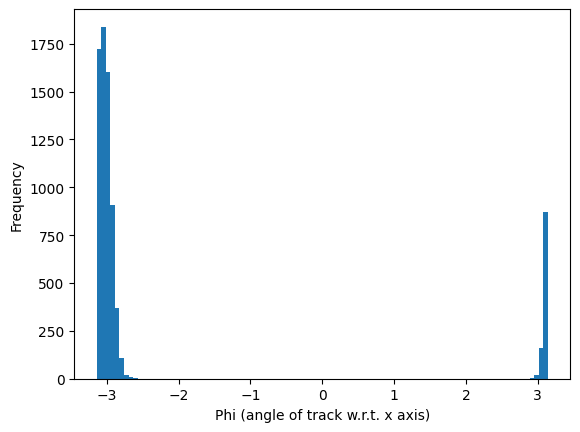

In [62]:
wctrk_phi = np.array(df['wctrk_phi'].values)

plt.hist(wctrk_phi, bins=100)
plt.xlabel('Phi (angle of track w.r.t. x axis)')
plt.ylabel('Frequency')
plt.show()

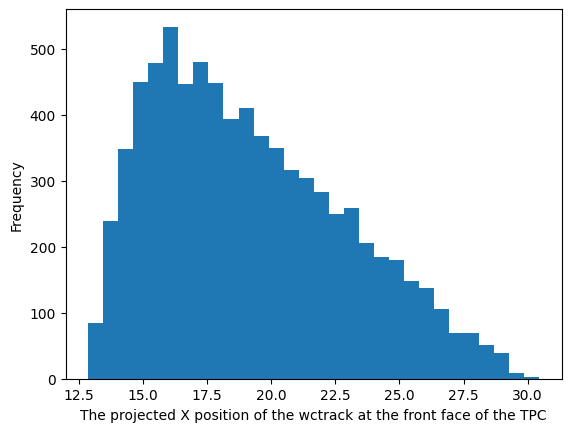

In [ ]:
wctrk_XFaceCoor = np.array(df['wctrk_XFaceCoor'].values)

# get WC X and track X difference

plt.hist(wctrk_XFaceCoor, bins=30)
plt.xlabel('The projected X position of the wctrack at the front face of the TPC')
plt.ylabel('Frequency')
plt.show()

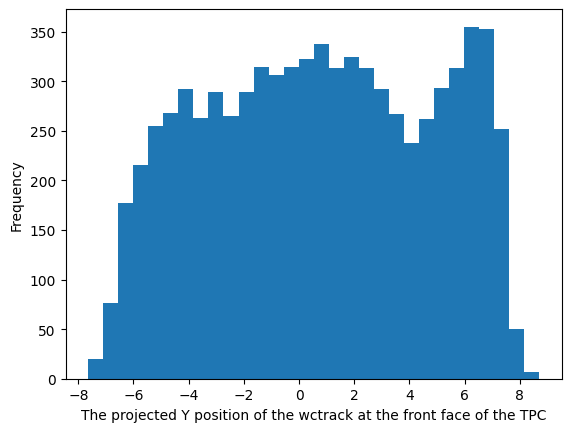

In [38]:
wctrk_YFaceCoor = np.array(df['wctrk_YFaceCoor'].values)

plt.hist(wctrk_YFaceCoor, bins=30)
plt.xlabel('The projected Y position of the wctrack at the front face of the TPC')
plt.ylabel('Frequency')
plt.show()

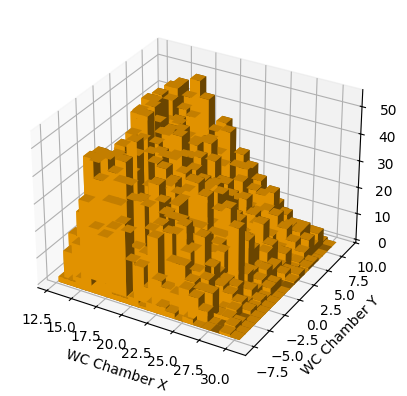

In [48]:
from mpl_toolkits.mplot3d import Axes3D

hist, xedges, yedges = np.histogram2d(wctrk_XFaceCoor, wctrk_YFaceCoor, bins=20)

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)
dz = hist.ravel()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(xpos, ypos, zpos, 1, 1, dz, color='orange')

ax.set_xlabel('WC Chamber X')
ax.set_ylabel('WC Chamber Y')
ax.set_zlabel('Frequency')

plt.show()

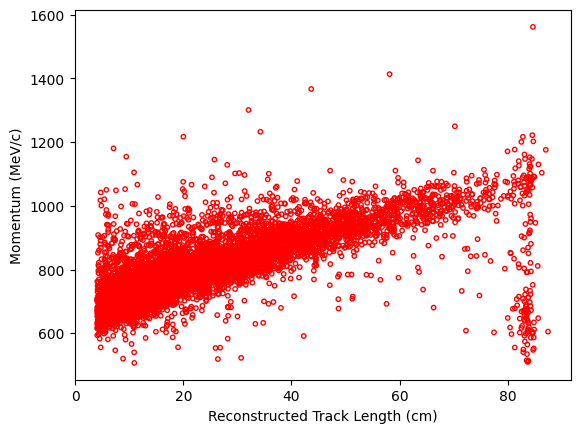

In [ ]:
wctrk_momentum = np.array(df['wctrk_momentum'].values)
trklength = np.array(df['trklength'].values)

plt.scatter(trklength, wctrk_momentum, s=10, facecolors='none', edgecolors='red')
plt.xlabel('Reconstructed Track Length (cm)')
plt.ylabel('Momentum (MeV/c)')
plt.show()

# Elena's plot and this - the difference, explaining why.

In [65]:
phi3 = df[df['wctrk_phi'] > 2.5]

In [71]:
# events with length > 80 cm (muon candidates?)
length80 = df[df['trklength'] > 80]
length80momentum950 = df[(df['trklength'] > 80) & (df['wctrk_momentum'] < 950)]

In [70]:
length80[['run', 'subrun', 'event']].to_csv("length80.csv", index=False)

In [72]:
length80momentum950[['run', 'subrun', 'event']].to_csv("length80momentum950.csv", index=False)